In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "-1"
import gym
import vectorincrement
import numpy as np
import random
import gin
from vectorincrement.observation_encoder import KerasEncoder, KerasEncoderWrapper, get_obss_states
from gym.wrappers import TimeLimit
from matplotlib import pyplot as plt
import tensorflow as tf

In [3]:
gin.enter_interactive_mode()

# just loading parameters, cannot really load the file because the dimension might be different
gin.parse_config_file('config/cartpole_linear.gin')

In [8]:
def predict_states_from_obs(env_name="VectorIncrement-v0", time_limit=50, n_episodes=100,
                            batch_size=256, epochs=100):
    """Get states/observations from the env on a random policy, fit a linear model and plot the loss."""
    env = gym.make(env_name)
    if time_limit:
        env = TimeLimit(env, time_limit)
    env = KerasEncoderWrapper(env)

    obss, states = get_obss_states(env, n_episodes)
    m = tf.keras.Sequential([tf.keras.layers.Dense(states.shape[1], input_shape=(obss.shape[1],),
                                           activation=None)])
    m.compile('adam', 'mse')
    h = m.fit(obss, states, batch_size=batch_size, epochs=epochs, verbose=0)

    plt.title(f"state~model(obs), env={env_name} steps={len(obss)}")
    plt.plot(h.history['loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.yscale('log')
    plt.show()

### VectorIncrement environment

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


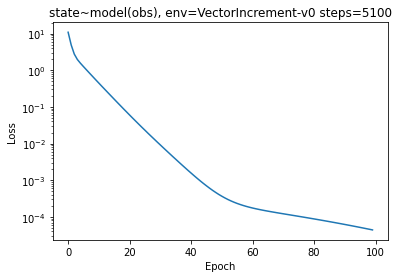

In [9]:
gin.parse_config_file('config/cartpole_linear.gin')
predict_states_from_obs()

Sanity check -- can fit the linear model data

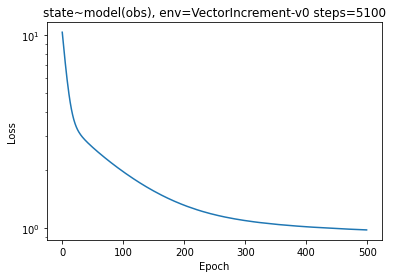

In [10]:
gin.parse_config_file('config/cartpole_nonlinear.gin')
predict_states_from_obs(epochs=500)

There seems to be no problems with non-linearity (a possible issue is that the net is in the linear regime) -- the loss does not go to 0 (on the log plot it would be negative values)

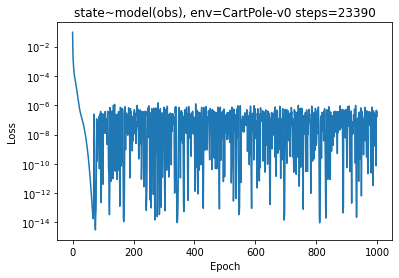

In [15]:
gin.parse_config_file('config/cartpole_linear.gin')
predict_states_from_obs(env_name="CartPole-v0", time_limit=None, epochs=1000, n_episodes=1000)

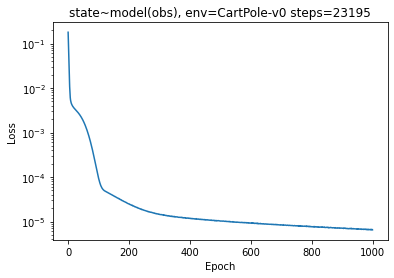

In [14]:
gin.parse_config_file('config/cartpole_nonlinear.gin')
predict_states_from_obs(env_name="CartPole-v0", time_limit=None, epochs=1000, n_episodes=1000)

In [ ]:
# only slightly different for cartpole...